#Exercise 3 : Stochastic Gradient Learning in Neural Networks

In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt

In [32]:
df_data = pd.read_csv('breast-cancer-wisconsin.data',sep=',',header=None,names=[str(i) for i in range(10)]+['target'])
df_data.head(10)

,0,1,2,3,4,5,6,7,8,9,target
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [73]:
class SGD():
  def __init__(self, data_x, data_y):
    self.data_x=data_x
    self.data_y=data_y
    self.n, self.d = data_x.shape
    self.w=np.zeros(self.d)
  def update_weights(self, learning_rate, j):
    x,y=data_x[j],data_y[j]
    self.w=self.w - learning_rate*(-(y-x@self.w.T)*x)
    self.w/=np.linalg.norm(self.w)
  def compute(self, nb_iterations=10000, w_ini=None):
    if not w_ini:
      self.w_ini=np.zeros(self.d)
    else:
      self.w=w_ini
    self.w.shape
    for i in range(1,nb_iterations+1):
      j=rd.randint(0,self.n-1)
      learning_rate=1/i
      self.update_weights(learning_rate, j)
  def accuracy(self):
    ans=0
    for i in range(self.n):
      x,y=self.data_x[i], self.data_y[i]
      output=x@self.w.T
      if (output<3 and y==2) or (output >= 3 and y==4):
        ans+=1
    return ans/self.n
    


(1, 2)


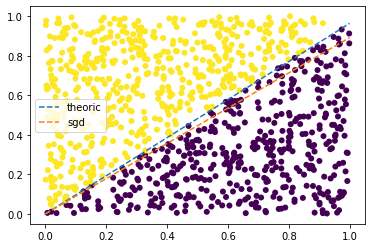

In [24]:
nb_points=1000
wbar=np.array([-rd.random(),rd.random()])
data_x=np.matrix([[rd.random(),rd.random()] for i in range(nb_points)])
data_y=np.matrix([[1] if data_x[i]@wbar.T>0 else [-1] for i in range(nb_points)])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter([p[0,0] for p in data_x],[p[0,1] for p in data_x],c=[p[0,0] for p in data_y],lw=0)

sgd=SGD(data_x,data_y)
sgd.compute()
what=sgd.w

print(what.shape)
x=np.linspace(0,1,100)
ax.plot(x, -wbar[0]/wbar[1]*x, linestyle='dashed')
ax.plot(x, -what[0,0]/what[0,1]*x, linestyle='dashed')
plt.legend(['theoric', 'sgd'])

(1, 2)


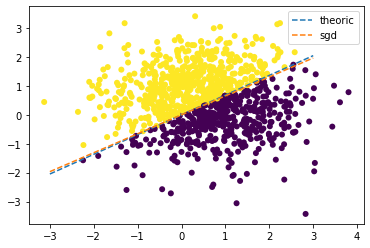

In [23]:
nb_points=1000
wbar=np.array([-rd.random(),rd.random()])
data_x=np.matrix([[rd.random()+np.random.normal(0,1),rd.random()+np.random.normal(0,1)] for i in range(nb_points)])
data_y=np.matrix([[1] if data_x[i]@wbar.T>0 else [-1] for i in range(nb_points)])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter([p[0,0] for p in data_x],[p[0,1] for p in data_x],c=[p[0,0] for p in data_y],lw=0)

sgd=SGD(data_x,data_y)
sgd.compute()
what=sgd.w

print(what.shape)
x=np.linspace(-3,3,100)
ax.plot(x, -wbar[0]/wbar[1]*x, linestyle='dashed')
ax.plot(x, -what[0,0]/what[0,1]*x, linestyle='dashed')
plt.legend(['theoric', 'sgd'])


In [33]:
df_data = df_data.replace('?', np.NaN)
df_data = df_data.dropna()
df_data

,0,1,2,3,4,5,6,7,8,9,target
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [76]:
data = df_data.to_numpy()
data_x=np.matrix(data[:, 1:10], dtype=float)
data_y=np.matrix([[e] for e in data[:, 10]], dtype =float)

sgd=SGD(data_x,data_y)
sgd.compute()
print("Accuracy of the Model : {:.3} %".format(sgd.accuracy()))

Accuracy of the Model : 0.902 %
